In [2]:
import os
import sys

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import regularizers

# Define constants
IMAGE_SIZE = 64
BATCH_SIZE = 64
NUM_CLASSES = 200
EPOCHS = 15 # Increase the number of epochs for better convergence

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'tiny-imagenet-200/train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

validation_generator = val_datagen.flow_from_directory(
    'tiny-imagenet-200/val',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Found 100001 images belonging to 200 classes.
Found 9950 images belonging to 200 classes.


In [3]:
EPOCHS=15
BATCH_SIZE = 256

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 64, 64, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 64, 64, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 64, 64, 64)        256       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 64, 64, 64)        0

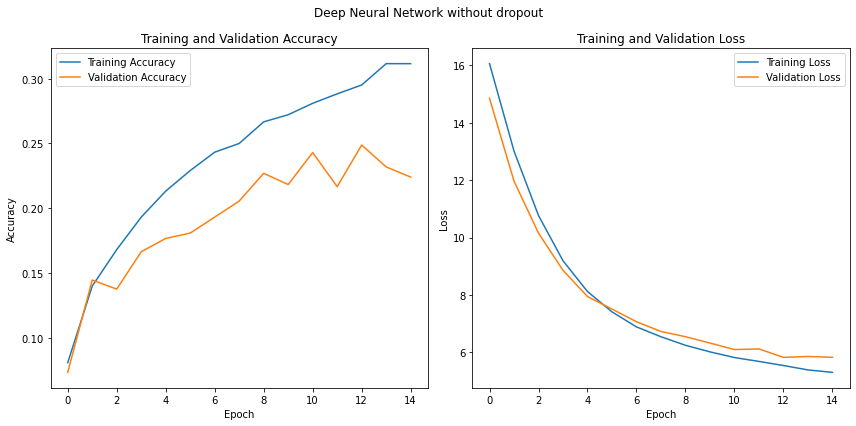

In [4]:
#Deep neural network without dropout 
from tensorflow.keras import regularizers, optimizers, activations, initializers
from tensorflow.keras.layers import LayerNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
import pandas as pd
import os, shutil
import time
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Nadam, SGD
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras import losses

# Define the model
model_DNN1 = models.Sequential()

# Layer 1
model_DNN1.add(Conv2D(64, (3, 3), strides=(1,1), padding='same', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), kernel_regularizer=regularizers.l2(0.001), kernel_initializer=initializers.he_normal()))
model_DNN1.add(BatchNormalization())
model_DNN1.add(Activation('relu'))

# Layer 2
model_DNN1.add(Conv2D(64, (3, 3), strides=(1,1), padding='same', kernel_regularizer=regularizers.l2(0.001), kernel_initializer=initializers.he_normal()))
model_DNN1.add(BatchNormalization())
model_DNN1.add(Activation('relu'))
model_DNN1.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# Layer 3
model_DNN1.add(Conv2D(128, (3, 3), strides=(1,1), padding='same', kernel_regularizer=regularizers.l2(0.001), kernel_initializer=initializers.he_normal()))
model_DNN1.add(BatchNormalization())
model_DNN1.add(Activation('relu'))

# Layer 4
model_DNN1.add(Conv2D(128, (3, 3), strides=(1,1), padding='same', kernel_regularizer=regularizers.l2(0.001), kernel_initializer=initializers.he_normal()))
model_DNN1.add(BatchNormalization())
model_DNN1.add(Activation('relu'))
model_DNN1.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# Layer 5
model_DNN1.add(Conv2D(256, (3, 3), strides=(1,1), padding='same', kernel_regularizer=regularizers.l2(0.001), kernel_initializer=initializers.he_normal()))
model_DNN1.add(BatchNormalization())
model_DNN1.add(Activation('relu'))

# Layer 6
model_DNN1.add(Conv2D(512, (3, 3), strides=(1,1), padding='same', kernel_regularizer=regularizers.l2(0.001), kernel_initializer=initializers.he_normal()))
model_DNN1.add(BatchNormalization())
model_DNN1.add(Activation('relu'))
model_DNN1.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same'))

# Flatten
model_DNN1.add(Flatten())

# Fully connected layers
model_DNN1.add(Dense(4096, kernel_regularizer=regularizers.l2(0.001), kernel_initializer=initializers.he_normal()))
model_DNN1.add(BatchNormalization())
model_DNN1.add(Activation('relu'))

model_DNN1.add(Dense(1024, kernel_regularizer=regularizers.l2(0.001), kernel_initializer=initializers.he_normal()))
model_DNN1.add(BatchNormalization())
model_DNN1.add(Activation('relu'))

# Output layer
model_DNN1.add(Dense(NUM_CLASSES, activation='softmax'))

# Compile the model
optimizer = optimizers.Adam(learning_rate=0.0001)
model_DNN1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Print model summary
model_DNN1.summary()

# Early stopping and learning rate reduction callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)


# Train the model
history = model_DNN1.fit(
    train_generator,
    steps_per_epoch=train_generator.n // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // BATCH_SIZE,
    callbacks=[early_stopping]
)

#plot for deep neural network without dropout
import matplotlib.pyplot as plt

# Get training and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.suptitle("Deep Neural Network without dropout")

plt.tight_layout()
plt.show()